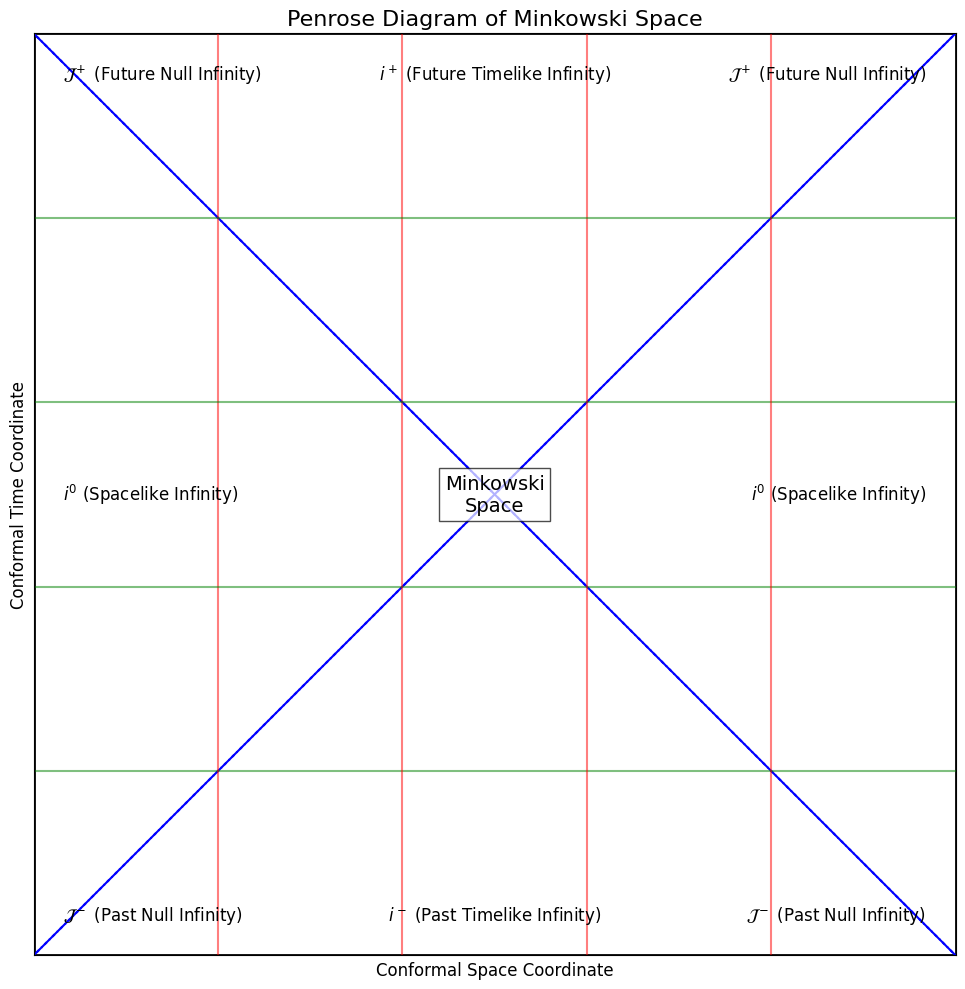

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.transforms as transforms

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Set axis limits
ax.set_xlim(-np.pi/2, np.pi/2)
ax.set_ylim(-np.pi/2, np.pi/2)

# Draw the Penrose diagram boundaries
ax.plot([-np.pi/2, np.pi/2], [np.pi/2, np.pi/2], 'k-', lw=2)  # Future timelike infinity (i+)
ax.plot([-np.pi/2, np.pi/2], [-np.pi/2, -np.pi/2], 'k-', lw=2)  # Past timelike infinity (i-)
ax.plot([np.pi/2, np.pi/2], [-np.pi/2, np.pi/2], 'k-', lw=2)  # Right spacelike infinity (i0)
ax.plot([-np.pi/2, -np.pi/2], [-np.pi/2, np.pi/2], 'k-', lw=2)  # Left spacelike infinity (i0)

# Add light cone lines
t = np.linspace(-np.pi/2, np.pi/2, 1000)
ax.plot(t, t, 'b--', lw=1.5)  # Future-directed light ray (45 degrees)
ax.plot(t, -t, 'b--', lw=1.5)  # Past-directed light ray (-45 degrees)
ax.plot(-t, t, 'b--', lw=1.5)  # Future-directed light ray (135 degrees)
ax.plot(-t, -t, 'b--', lw=1.5)  # Past-directed light ray (-135 degrees)

# Add coordinate grid (constant t and constant x hypersurfaces)
num_lines = 5
for i in range(1, num_lines):
    # Constant time lines
    T = np.pi/2 * (2*i/num_lines - 1)
    x = np.linspace(-np.pi/2, np.pi/2, 100)
    t = np.ones_like(x) * T
    ax.plot(x, t, 'g-', alpha=0.5)
    
    # Constant space lines
    X = np.pi/2 * (2*i/num_lines - 1)
    t = np.linspace(-np.pi/2, np.pi/2, 100)
    x = np.ones_like(t) * X
    ax.plot(x, t, 'r-', alpha=0.5)

# Add labels for the regions
ax.text(0, np.pi/2 - 0.1, r'$i^+$ (Future Timelike Infinity)', ha='center', va='top', fontsize=12)
ax.text(0, -np.pi/2 + 0.1, r'$i^-$ (Past Timelike Infinity)', ha='center', va='bottom', fontsize=12)
ax.text(np.pi/2 - 0.1, 0, r'$i^0$ (Spacelike Infinity)', ha='right', va='center', fontsize=12)
ax.text(-np.pi/2 + 0.1, 0, r'$i^0$ (Spacelike Infinity)', ha='left', va='center', fontsize=12)
ax.text(np.pi/2 - 0.1, np.pi/2 - 0.1, r'$\mathcal{J}^+$ (Future Null Infinity)', ha='right', va='top', fontsize=12)
ax.text(-np.pi/2 + 0.1, np.pi/2 - 0.1, r'$\mathcal{J}^+$ (Future Null Infinity)', ha='left', va='top', fontsize=12)
ax.text(np.pi/2 - 0.1, -np.pi/2 + 0.1, r'$\mathcal{J}^-$ (Past Null Infinity)', ha='right', va='bottom', fontsize=12)
ax.text(-np.pi/2 + 0.1, -np.pi/2 + 0.1, r'$\mathcal{J}^-$ (Past Null Infinity)', ha='left', va='bottom', fontsize=12)
ax.text(0, 0, 'Minkowski\nSpace', ha='center', va='center', fontsize=14, bbox=dict(facecolor='white', alpha=0.7))

# Set labels and title
ax.set_xlabel('Conformal Space Coordinate', fontsize=12)
ax.set_ylabel('Conformal Time Coordinate', fontsize=12)
ax.set_title('Penrose Diagram of Minkowski Space', fontsize=16)

# Make equal aspect ratio
ax.set_aspect('equal')

# Remove ticks
ax.set_xticks([])
ax.set_yticks([])

plt.tight_layout()
plt.show()

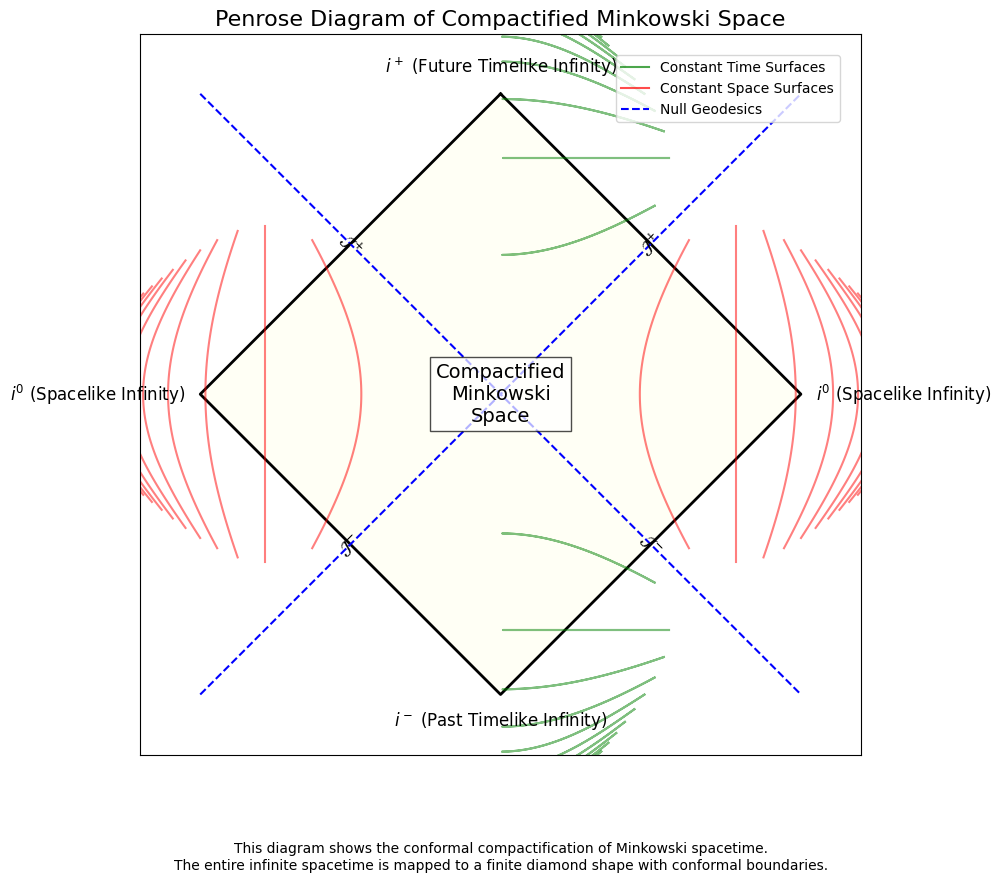

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, FancyArrowPatch
from matplotlib.lines import Line2D

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Set up the coordinate transformations
def minkowski_to_penrose(t, x):
    # Calculate r
    r = np.sqrt(x**2)
    
    # Avoid division by zero
    if r == 0 and t == 0:
        return 0, 0
    
    # Transform to null coordinates
    u = t - r
    v = t + r
    
    # Apply the compactification transformation
    up = np.arctan(u)
    vp = np.arctan(v)
    
    # Transform to Penrose coordinates
    T = up + vp
    R = vp - up
    
    return R/2, T/2  # Normalize to fit in the diagram

# Define the boundaries of the Penrose diagram (diamond shape)
penrose_boundary_x = [0, 1, 0, -1, 0]
penrose_boundary_y = [1, 0, -1, 0, 1]

# Plot the diamond boundary
ax.plot(penrose_boundary_x, penrose_boundary_y, 'k-', lw=2)

# Fill the diamond with a light color
diamond = Polygon(list(zip(penrose_boundary_x[:-1], penrose_boundary_y[:-1])), 
                  closed=True, fill=True, color='lightyellow', alpha=0.3)
ax.add_patch(diamond)

# Plot the conformal grid
num_lines = 12

# Function to generate hyperbolas in Minkowski space
def generate_hyperbola_points(a, type_h, num_points=100):
    if type_h == 'time':  # Constant time hyperbolas (t² - x² = a²)
        theta = np.linspace(-np.pi/2 + 0.1, np.pi/2 - 0.1, num_points)
        t = a * np.cosh(theta)
        x = a * np.sinh(theta)
    else:  # Constant space hyperbolas (x² - t² = a²)
        theta = np.linspace(-np.pi/2 + 0.1, np.pi/2 - 0.1, num_points)
        x = a * np.cosh(theta)
        t = a * np.sinh(theta)
    
    # Convert to Penrose coordinates
    penrose_points = [minkowski_to_penrose(ti, xi) for ti, xi in zip(t, x)]
    penrose_x, penrose_y = zip(*penrose_points)
    
    return penrose_x, penrose_y

# Plot time-like hyperbolas (constant proper time)
for i in range(1, num_lines):
    a = i * 0.5
    penrose_x, penrose_y = generate_hyperbola_points(a, 'time')
    ax.plot(penrose_x, penrose_y, 'g-', alpha=0.5)
    
    # Plot the negative time part
    penrose_x, penrose_y = generate_hyperbola_points(-a, 'time')
    ax.plot(penrose_x, penrose_y, 'g-', alpha=0.5)

# Plot space-like hyperbolas (constant proper distance)
for i in range(1, num_lines):
    a = i * 0.5
    penrose_x, penrose_y = generate_hyperbola_points(a, 'space')
    ax.plot(penrose_x, penrose_y, 'r-', alpha=0.5)
    
    # Plot the negative space part (left side)
    penrose_x_neg = [-x for x in penrose_x]
    ax.plot(penrose_x_neg, penrose_y, 'r-', alpha=0.5)

# Add null geodesics (45 degree lines)
ax.plot([-1, 1], [-1, 1], 'b--', lw=1.5)
ax.plot([-1, 1], [1, -1], 'b--', lw=1.5)

# Add labels for the corners of the diagram
ax.text(0, 1.05, r'$i^+$ (Future Timelike Infinity)', ha='center', va='bottom', fontsize=12)
ax.text(0, -1.05, r'$i^-$ (Past Timelike Infinity)', ha='center', va='top', fontsize=12)
ax.text(1.05, 0, r'$i^0$ (Spacelike Infinity)', ha='left', va='center', fontsize=12)
ax.text(-1.05, 0, r'$i^0$ (Spacelike Infinity)', ha='right', va='center', fontsize=12)

# Add labels for the edges (null infinities)
ax.text(0.5, 0.5, r'$\mathcal{J}^+$', ha='center', va='center', fontsize=12, rotation=45)
ax.text(-0.5, 0.5, r'$\mathcal{J}^+$', ha='center', va='center', fontsize=12, rotation=-45)
ax.text(0.5, -0.5, r'$\mathcal{J}^-$', ha='center', va='center', fontsize=12, rotation=-45)
ax.text(-0.5, -0.5, r'$\mathcal{J}^-$', ha='center', va='center', fontsize=12, rotation=45)

# Add central label
ax.text(0, 0, 'Compactified\nMinkowski\nSpace', ha='center', va='center', fontsize=14, 
        bbox=dict(facecolor='white', alpha=0.7))

# Add legend
legend_elements = [
    Line2D([0], [0], color='g', alpha=0.7, label='Constant Time Surfaces'),
    Line2D([0], [0], color='r', alpha=0.7, label='Constant Space Surfaces'),
    Line2D([0], [0], color='b', linestyle='--', label='Null Geodesics')
]
ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.98, 0.98))

# Set axis properties
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Penrose Diagram of Compactified Minkowski Space', fontsize=16)

# Add explanatory text
#fig.text(0.5, 0.01, 
#         "This diagram shows the conformal compactification of Minkowski spacetime.\n"
#         "The entire infinite spacetime is mapped to a finite diamond shape with conformal boundaries.",
#         ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

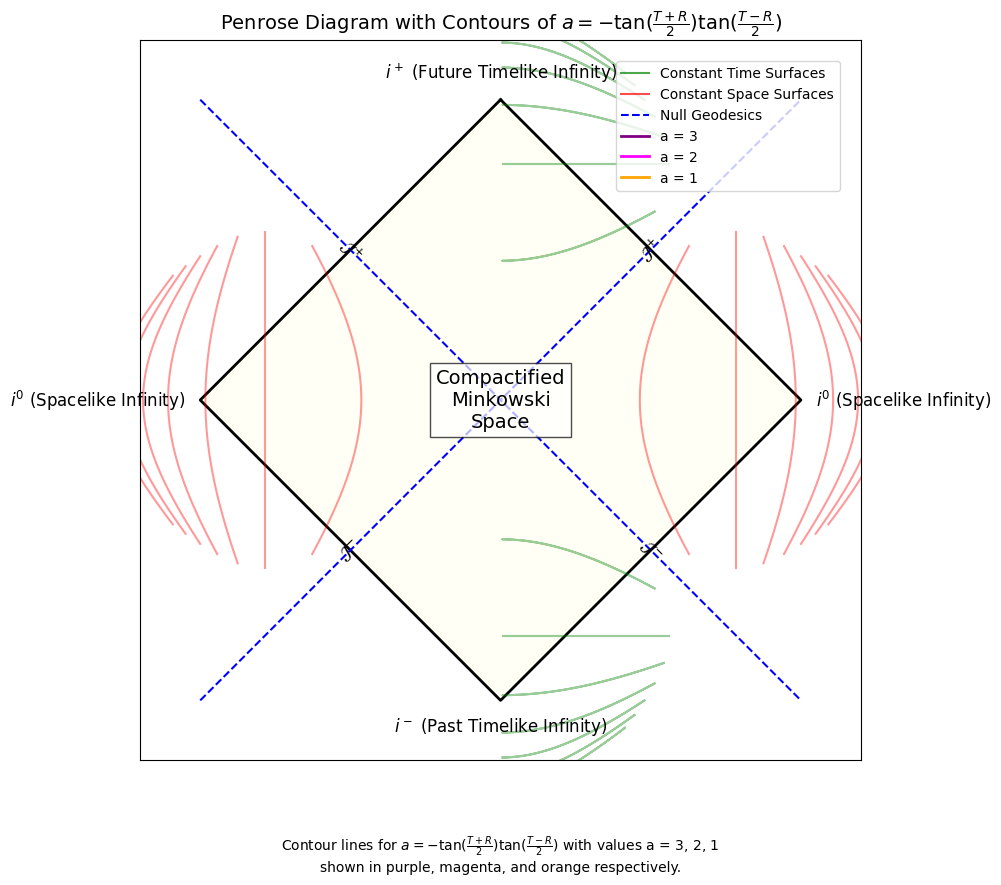

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, FancyArrowPatch
from matplotlib.lines import Line2D

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Set up the coordinate transformations
def minkowski_to_penrose(t, x):
    # Calculate r
    r = np.sqrt(x**2)
    
    # Avoid division by zero
    if r == 0 and t == 0:
        return 0, 0
    
    # Transform to null coordinates
    u = t - r
    v = t + r
    
    # Apply the compactification transformation
    up = np.arctan(u)
    vp = np.arctan(v)
    
    # Transform to Penrose coordinates
    T = up + vp
    R = vp - up
    
    return R/2, T/2  # Normalize to fit in the diagram

# Define the boundaries of the Penrose diagram (diamond shape)
penrose_boundary_x = [0, 1, 0, -1, 0]
penrose_boundary_y = [1, 0, -1, 0, 1]

# Plot the diamond boundary
ax.plot(penrose_boundary_x, penrose_boundary_y, 'k-', lw=2)

# Fill the diamond with a light color
diamond = Polygon(list(zip(penrose_boundary_x[:-1], penrose_boundary_y[:-1])), 
                  closed=True, fill=True, color='lightyellow', alpha=0.3)
ax.add_patch(diamond)

# Plot the conformal grid
num_lines = 8

# Function to generate hyperbolas in Minkowski space
def generate_hyperbola_points(a, type_h, num_points=100):
    if type_h == 'time':  # Constant time hyperbolas (t² - x² = a²)
        theta = np.linspace(-np.pi/2 + 0.1, np.pi/2 - 0.1, num_points)
        t = a * np.cosh(theta)
        x = a * np.sinh(theta)
    else:  # Constant space hyperbolas (x² - t² = a²)
        theta = np.linspace(-np.pi/2 + 0.1, np.pi/2 - 0.1, num_points)
        x = a * np.cosh(theta)
        t = a * np.sinh(theta)
    
    # Convert to Penrose coordinates
    penrose_points = [minkowski_to_penrose(ti, xi) for ti, xi in zip(t, x)]
    penrose_x, penrose_y = zip(*penrose_points)
    
    return penrose_x, penrose_y

# Plot time-like hyperbolas (constant proper time)
for i in range(1, num_lines):
    a = i * 0.5
    penrose_x, penrose_y = generate_hyperbola_points(a, 'time')
    ax.plot(penrose_x, penrose_y, 'g-', alpha=0.4)
    
    # Plot the negative time part
    penrose_x, penrose_y = generate_hyperbola_points(-a, 'time')
    ax.plot(penrose_x, penrose_y, 'g-', alpha=0.4)

# Plot space-like hyperbolas (constant proper distance)
for i in range(1, num_lines):
    a = i * 0.5
    penrose_x, penrose_y = generate_hyperbola_points(a, 'space')
    ax.plot(penrose_x, penrose_y, 'r-', alpha=0.4)
    
    # Plot the negative space part (left side)
    penrose_x_neg = [-x for x in penrose_x]
    ax.plot(penrose_x_neg, penrose_y, 'r-', alpha=0.4)

# Add null geodesics (45 degree lines)
ax.plot([-1, 1], [-1, 1], 'b--', lw=1.5)
ax.plot([-1, 1], [1, -1], 'b--', lw=1.5)

# Function to calculate a = -tan((T+R)/2)tan((T-R)/2)
def calculate_a(R, T):
    u = (T - R)/2  # Divide by 2 because of our normalization
    v = (T + R)/2  # Divide by 2 because of our normalization
    return -np.tan(v) * np.tan(u)

# Create a grid for contour plotting
grid_size = 200
R_grid, T_grid = np.meshgrid(np.linspace(-0.99, 0.99, grid_size), 
                             np.linspace(-0.99, 0.99, grid_size))
A_grid = calculate_a(R_grid, T_grid)

# Create a mask for points outside the diamond
mask = (np.abs(T_grid) + np.abs(R_grid) > 1)
A_grid = np.ma.masked_array(A_grid, mask)

# Plot contour lines for a = 3, 2, 1
contour_values = [1, 2, 3]
contour = ax.contour(R_grid, T_grid, A_grid, contour_values, 
                    colors=['purple', 'magenta', 'orange'], 
                    linewidths=2.5, zorder=10)

# Add contour labels
plt.clabel(contour, inline=True, fontsize=10, fmt='a = %1.0f')

# Add labels for the corners of the diagram
ax.text(0, 1.05, r'$i^+$ (Future Timelike Infinity)', ha='center', va='bottom', fontsize=12)
ax.text(0, -1.05, r'$i^-$ (Past Timelike Infinity)', ha='center', va='top', fontsize=12)
ax.text(1.05, 0, r'$i^0$ (Spacelike Infinity)', ha='left', va='center', fontsize=12)
ax.text(-1.05, 0, r'$i^0$ (Spacelike Infinity)', ha='right', va='center', fontsize=12)

# Add labels for the edges (null infinities)
ax.text(0.5, 0.5, r'$\mathcal{J}^+$', ha='center', va='center', fontsize=12, rotation=45)
ax.text(-0.5, 0.5, r'$\mathcal{J}^+$', ha='center', va='center', fontsize=12, rotation=-45)
ax.text(0.5, -0.5, r'$\mathcal{J}^-$', ha='center', va='center', fontsize=12, rotation=-45)
ax.text(-0.5, -0.5, r'$\mathcal{J}^-$', ha='center', va='center', fontsize=12, rotation=45)

# Add central label
ax.text(0, 0, 'Compactified\nMinkowski\nSpace', ha='center', va='center', fontsize=14, 
        bbox=dict(facecolor='white', alpha=0.7))

# Add legend
legend_elements = [
    Line2D([0], [0], color='g', alpha=0.7, label='Constant Time Surfaces'),
    Line2D([0], [0], color='r', alpha=0.7, label='Constant Space Surfaces'),
    Line2D([0], [0], color='b', linestyle='--', label='Null Geodesics'),
    Line2D([0], [0], color='purple', lw=2, label='a = 3'),
    Line2D([0], [0], color='magenta', lw=2, label='a = 2'),
    Line2D([0], [0], color='orange', lw=2, label='a = 1')
]
ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.98, 0.98))

# Fix LaTeX rendering in the title
plt.rcParams.update({
    "text.usetex": False
})

# Set axis properties
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])
ax.set_title(r'Penrose Diagram with Contours of $a = -\tan(\frac{T+R}{2})\tan(\frac{T-R}{2})$', fontsize=14)

# Add explanatory text
fig.text(0.5, 0.01, 
         r"Contour lines for $a = -\tan(\frac{T+R}{2})\tan(\frac{T-R}{2})$ with values a = 3, 2, 1" + "\n"
         "shown in purple, magenta, and orange respectively.",
         ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


# First I will create two constant r and two constant t surfaces

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, FancyArrowPatch
from matplotlib.lines import Line2D
import pandas as pd



tsufrace5=pd.read_csv('constantt5.csv',
                 float_precision='high',  # Use high precision parser
                 dtype=np.float64,
                 engine='c') 
tsufrace8=pd.read_csv('constantt8.csv',
                 float_precision='high',  # Use high precision parser
                 dtype=np.float64,
                 engine='c') 
rsufrace22=pd.read_csv('constantr22.csv',
                 float_precision='high',  # Use high precision parser
                 dtype=np.float64,
                 engine='c') 
rsufrace72=pd.read_csv('constantr72.csv',
                 float_precision='high',  # Use high precision parser
                 dtype=np.float64,
                 engine='c') 
tsufrace5.columns=['R','T']
tsufrace8.columns=['R','T']
rsufrace22.columns=['R','T']
rsufrace72.columns=['R','T']
Osufrace1=pd.read_csv('constantO1.csv',
                 float_precision='high',  # Use high precision parser
                 dtype=np.float64,
                 engine='c') 
Osufrace1.columns=['R','T']

Osufrace19=pd.read_csv('constantO19.csv',
                 float_precision='high',  # Use high precision parser
                 dtype=np.float64,
                 engine='c') 
Osufrace19.columns=['R','T']

threshold=0.00000001
Osufrace1=Osufrace1[(Osufrace1['R']>=threshold) & (Osufrace1['R']<np.pi)]
Osufrace19=Osufrace19[(Osufrace19['R']>=threshold) & (Osufrace19['R']<np.pi)]
# print(tsufrace5)
print(tsufrace8)
# rsufrace1.iloc[1,1]
# x = rsufrace5['R'].values.astype(np.float64)
print(Osufrace1)

        R         T
0    0.01  1.349442
1    0.02  1.349322
2    0.03  1.349122
3    0.04  1.348842
4    0.05  1.348482
..    ...       ...
309  3.10  0.000692
310  3.11  0.000399
311  3.12  0.000186
312  3.13  0.000054
313  3.14  0.000001

[314 rows x 2 columns]
            R         T
78   1.563266 -1.561593
79   1.546904 -1.541593
80   1.530544 -1.521593
81   1.514190 -1.501593
82   1.497844 -1.481593
..        ...       ...
230  1.495241  1.478407
231  1.511586  1.498407
232  1.527939  1.518407
233  1.544298  1.538407
234  1.560660  1.558407

[157 rows x 2 columns]


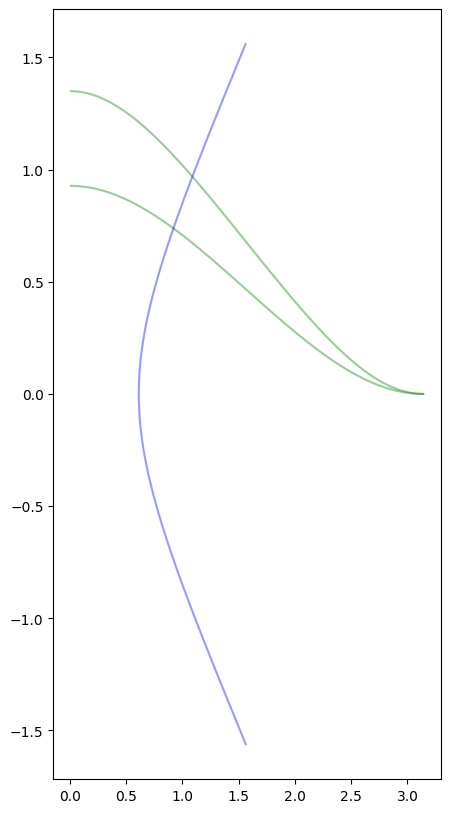

In [95]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(5, 10))
ax.plot(tsufrace5['R'], tsufrace5['T'], 'g-', alpha=0.4)
ax.plot(tsufrace8['R'], tsufrace8['T'], 'g-', alpha=0.4)
ax.plot(Osufrace1['R'], Osufrace1['T'], 'b-', alpha=0.4)
plt.show()
# import numpy as np
# import matplotlib.pyplot as plt

# # Set data type to float64 (double precision) when creating arrays
# x = rsufrace5['R'].values.astype(np.float64)
# y = rsufrace5['T'].values.astype(np.float64)
# # Configure matplotlib to use a higher precision
# plt.rcParams['path.simplify'] = False  # Don't simplify lines
# plt.rcParams['agg.path.chunksize'] = 10000  # Increase chunk size for better precision

# # Create the plot
# fig, ax = plt.subplots()
# ax.plot(x, y, '-', lw=1)

# # Set axis formatter to show more decimal places
# from matplotlib.ticker import FormatStrFormatter
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.10f'))
# ax.xaxis.set_major_formatter(FormatStrFormatter('%.10f'))

# plt.show()

<>:91: SyntaxWarning: invalid escape sequence '\O'
<>:91: SyntaxWarning: invalid escape sequence '\O'
/tmp/ipykernel_9743/2579752971.py:91: SyntaxWarning: invalid escape sequence '\O'
  Line2D([0], [0], color='b', alpha=0.4, label='Constant $\Omega$ surfaces'),


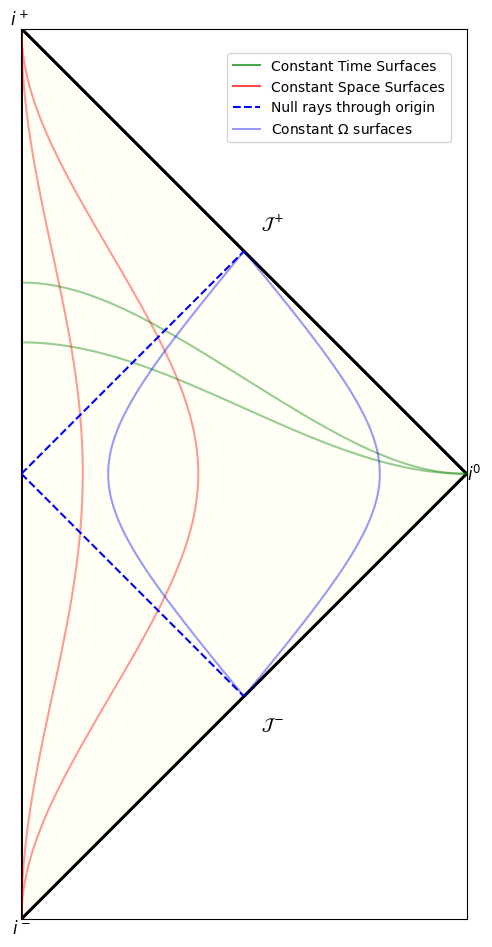

In [113]:
#superdata=pd.read_csv('OGLE4.csv',usecols=['I1','V','V_I','P_1','A_1'],comment='#')

# Create figure and axis
fig, ax = plt.subplots(figsize=(5, 10))

# Set up the coordinate transformations
def minkowski_to_penrose(t, x):
    # Calculate r
    r = np.sqrt(x**2)
    penrose_x
    # Avoid division by zero
    if r == 0 and t == 0:
        return 0, 0
    
    # Transform to null coordinates
    u = t - r
    v = t + r
    
    # Apply the compactification transformation
    up = np.arctan(u)
    vp = np.arctan(v)
    
    # Transform to Penrose coordinates
    T = up + vp
    R = vp - up
    
    return R/2, T/2  # Normalize to fit in the diagram

# Define the boundaries of the Penrose diagram (diamond shape)
penrose_boundary_x = [0, np.pi, 0,  0]
penrose_boundary_y = [-np.pi, 0, np.pi, -np.pi]

# Plot the diamond boundary
ax.plot(penrose_boundary_x, penrose_boundary_y, 'k-', lw=2)

# Plot the diamond boundary
ax.plot(penrose_boundary_x, penrose_boundary_y, 'k-', lw=2)

# Fill the diamond with a light color
diamond = Polygon(list(zip(penrose_boundary_x[:-1], penrose_boundary_y[:-1])), 
                  closed=True, fill=True, color='lightyellow', alpha=0.3)
ax.add_patch(diamond)



# # Create figure and axis
# fig, ax = plt.subplots(figsize=(5, 10))
# ax.plot(tsufrace2['R'], tsufrace2['T'], 'g-', alpha=0.4)
# plt.show()

# Plotting constant  t surface
ax.plot(tsufrace8['R'], tsufrace8['T'], 'g-', alpha=0.4)
ax.plot(tsufrace5['R'], tsufrace5['T'], 'g-', alpha=0.4)

# Plotting constant  r surface
ax.plot(rsufrace22['R'], rsufrace22['T'], 'r-', alpha=0.4)
ax.plot(rsufrace72['R'], rsufrace72['T'], 'r-', alpha=0.4)

# Plotting constant  Omega surface
ax.plot(Osufrace1['R'], Osufrace1['T'], 'b-', alpha=0.4)
ax.plot(Osufrace19['R'], Osufrace19['T'], 'b-', alpha=0.4)

# Add null geodesics (45 degree lines)
ax.plot([0, np.pi/2], [0, np.pi/2], 'b--', lw=1.5)
ax.plot([0, np.pi/2], [0, -np.pi/2], 'b--', lw=1.5)


# Add labels for the corners of the diagram
# ax.text(0, np.pi, r'$u^+$ (Future Timelike Infinity)', ha='center', va='bottom', fontsize=12)
# ax.text(0, -np.pi, r'$i^-$ (Past Timelike Infinity)', ha='center', va='top', fontsize=12)
# ax.text(np.pi, 0, r'$i^0$ (Spacelike Infinity)', ha='left', va='center', fontsize=12)

ax.text(0, np.pi, r'$i^+$ ', ha='center', va='bottom', fontsize=12)
ax.text(0, -np.pi, r'$i^-$' , ha='center', va='top', fontsize=12)
ax.text(np.pi, 0, r'$i^0$ ', ha='left', va='center', fontsize=12)



# Add labels for the edges (null infinities)
ax.text(np.pi/2+0.2, np.pi/2+0.2, r'$\mathcal{J}^+$', ha='center', va='center', fontsize=12)
#ax.text(-0.55, 0.55, r'$\mathcal{J}^+$', ha='center', va='center', fontsize=12)
ax.text(np.pi/2+0.2, -np.pi/2-.2, r'$\mathcal{J}^-$', ha='center', va='center', fontsize=12)
#ax.text(-0.55, -0.55, r'$\mathcal{J}^-$', ha='center', va='center', fontsize=12)


# Add legend
legend_elements = [
    Line2D([0], [0], color='g', alpha=0.7, label='Constant Time Surfaces'),
    Line2D([0], [0], color='r', alpha=0.7, label='Constant Space Surfaces'),
    Line2D([0], [0], color='b', linestyle='--', label='Null rays through origin'),
    Line2D([0], [0], color='b', alpha=0.4, label='Constant $\Omega$ surfaces'),
#    Line2D([0], [0], color='purple', lw=2, label='a = 3'),
#    Line2D([0], [0], color='magenta', lw=2, label='a = 2'),
#    Line2D([0], [0], color='orange', lw=2, label='a = 1')
]
ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.98, 0.98))

# Fix LaTeX rendering in the title
plt.rcParams.update({
    "text.usetex": False
})

# Set axis properties
ax.set_xlim(0, np.pi)
ax.set_ylim(-np.pi, np.pi)
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])
# ax.set_title(r'Penrose Diagram with Contours of $a = -\tan(\frac{T+R}{2})\tan(\frac{T-R}{2})$', fontsize=14)



plt.tight_layout()
plt.savefig('plot.png', dpi=300, bbox_inches='tight')
plt.show()


In [109]:
plt.savefig('plot.png', dpi=300, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

In [ ]:

# Method 2: Using root_scalar with different methods
def equation2(x):
    return 0.02-1/2(np.tan((.1+x)/2)-np.tan((.1-x)/2))

# Initial guess
x0 = 1.0
0.55
# Find root using fsolve
root = optimize.fsolve(equation2, x0)
print(f"Root using fsolve: {root[0]}")

<>:3: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:3: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
/tmp/ipykernel_9743/2052734690.py:3: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  return 0.02-1/2(np.tan((.1+x)/2)-np.tan((.1-x)/2))


TypeError: 'int' object is not callable

In [ ]:
root = optimize.fsolve(0.1, x0)
print(f"Root using fsolve: {root[0]}")